In [128]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

In [236]:
grid = 10
grid_size = (grid, grid)
sub_grid_size = grid//2
nodes = grid * grid

weights = np.random.rand(nodes, 3)

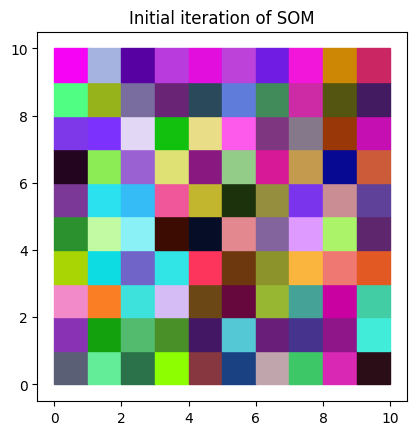

In [232]:
# Creating grid of 10 x 10 color patches
fig, ax = plt.subplots()
for i in range(10):
    for j in range(10):
        ax.add_patch(plt.Rectangle((i, j), 1, 1, color=weights[i*10+j]))

plt.axis('scaled')
plt.title('Initial iteration of SOM')
plt.show()

In [233]:
# Reading data from csv
data = pd.read_csv('Q1_countrydata.csv')

data = data.drop(['Province_State'], axis=1)
data = data.drop(['Country_Region'], axis=1)
data = data.drop(['Last_Update'], axis=1)

# print(data[data.isna().any(axis=1)])

# Normalize Confirmed, Deaths and Recovered columns with max
data['Confirmed'] = data['Confirmed'] / data['Confirmed'].max()
data['Deaths'] = data['Deaths'] / data['Deaths'].max()
data['Recovered'] = data['Recovered'] / data['Recovered'].max()

data.head()
data.describe()


,Lat,Long_,Confirmed,Deaths,Recovered
count,3893.000000,3893.000000,3980.000000,3980.000000,3980.000000
mean,36.005760,-72.065449,0.008065,0.007115,0.005626
std,12.995066,53.528288,0.040337,0.040950,0.038929
min,-52.368000,-174.159600,0.000000,0.000000,0.000000
25%,33.272157,-96.616339,0.000268,0.000154,0.000000
50%,37.954743,-86.854759,0.000753,0.000492,0.000000
75%,42.227692,-77.494647,0.002966,0.001782,0.000000
max,71.706900,178.065000,1.000000,1.000000,1.000000


In [277]:
# Training SOM

iterations = 1000
learning_decay_rate = 0.2
radius_decay_rate = 5
learning_decay = learning_decay_rate
radius_decay = radius_decay_rate

print("SOM Training Started")
for i in range(iterations):
    random_row = data.sample()

    index = random_row.index.values[0]
    random_row = random_row.to_numpy()
    lat, long, confirmed, deaths, recovered = random_row[0].tolist()

    diff_array = [pow((weight[0] - confirmed)**2 + (weight[1] - deaths)**2 + (weight[2] - recovered)**2, 1/2) for weight in weights]
    bmu = min(diff_array)
    index_bmu = np.unravel_index(diff_array.index(bmu), (grid, grid))

    for index in range(nodes):
        twod_index = np.unravel_index(index, (grid, grid))
        distance_to_bmu = pow((twod_index[0] - index_bmu[0])**2 + (twod_index[1] - index_bmu[1])**2, 1/2)
        if distance_to_bmu < radius_decay:
            theta = math.exp(-((distance_to_bmu**2)/(2*(radius_decay**2))))
            weights[index] = weights[index] + learning_decay * theta * ([confirmed, deaths, recovered] - weights[index])

    learning_decay = learning_decay_rate * math.exp((-i/iterations))
    radius_decay = radius_decay_rate * math.exp((-i/iterations))


print("SOM Training Completed")

SOM Training Started
SOM Training Completed


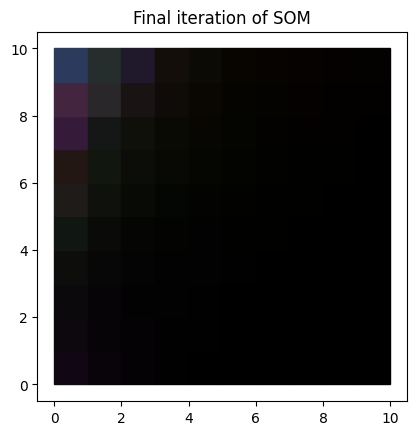

In [278]:
# Creating grid of 10 x 10 color patches
fig, ax = plt.subplots()
for i in range(10):
    for j in range(10):
        ax.add_patch(plt.Rectangle((i, j), 1, 1, color=weights[i*10+j]))

plt.axis('scaled')
plt.title('Final iteration of SOM')
plt.show()